In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


## The Data

Let's start by reading in the csv file into a pandas dataframe and preview it's content

In [22]:
#Read our dataset into a dataframe.

df = pd.read_csv("loan_approval_dataset.csv")
print('number of columns',len(df))
df.head()

number of columns 4269


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


- Our dataset contains columns with information on Loan applicants.

In [21]:
#Check the number of columns in our dataset.
df.columns.to_list()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [4]:
#Preview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


From the above output we can see we had categorical features.

In [5]:
#Number of columns and rows in the data set.
df.shape

(4269, 13)

In [6]:
#To check simple statistics.

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Overview of categorical features

In [7]:
#check the unique values in the education column
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [8]:
#check the unique values in the loan status column
df[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [9]:
#check the unique values in the self employed column
df[' self_employed'].unique()

array([' No', ' Yes'], dtype=object)

# Exploratory Data Analysis


Step One: We check any missing data first by creating a simple heatmap in Seaborn.


<Axes: >

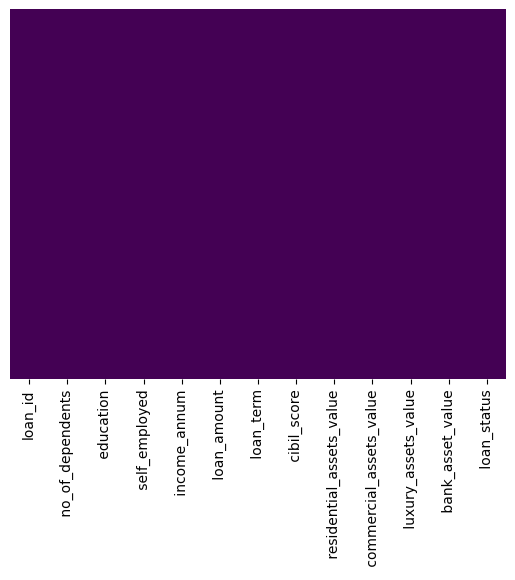

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the heatmap we can conclude that there are no null values in our dataset.

# Step Two: Data Visualisation

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_10036\2511329156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=' loan_status',data=df,palette='rainbow')


<Axes: xlabel=' loan_status', ylabel='count'>

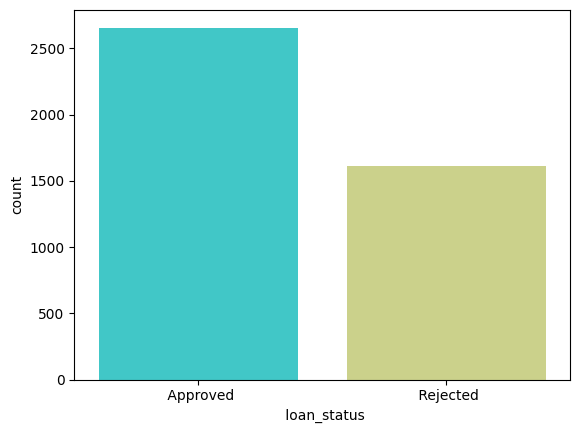

In [11]:
#Countplot to show distribution of approved and rejected loans
sns.countplot(x=' loan_status',data=df,palette='rainbow')

From the countplot, it can be deduced that more loan applications were approved than they were rejected.

That is, 62% Approved and 38% Rejected, as seen in the pie chart below


Counts for each unique self-employed status and loan status:
 self_employed   loan_status
No              Approved        1318
                Rejected         801
Yes             Approved        1338
                Rejected         812
dtype: int64


<Axes: xlabel=' self_employed', ylabel='count'>

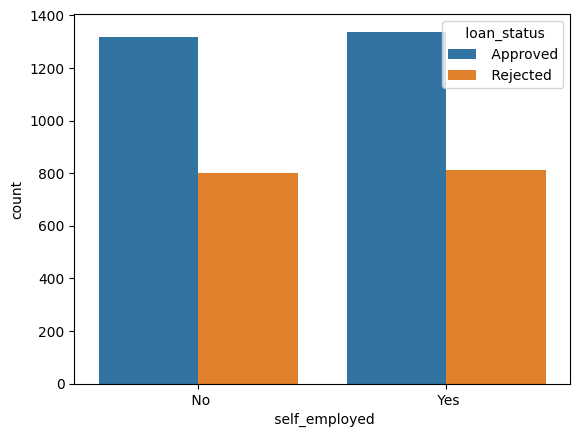

In [14]:
counts = df.groupby([' self_employed', ' loan_status']).size()
print("Counts for each unique self-employed status and loan status:")
print(counts)

sns.countplot(x=' self_employed',hue= ' loan_status',data=df)

From the two figures, we can conclude that the status of employment does not have much significance in determining whether the loan will be approved or not, since figures in both rejected and approved are close to same for both groups


Counts for each unique education status and loan status:
 education     loan_status
Graduate      Approved        1339
              Rejected         805
Not Graduate  Approved        1317
              Rejected         808
dtype: int64


<Axes: xlabel=' education', ylabel='count'>

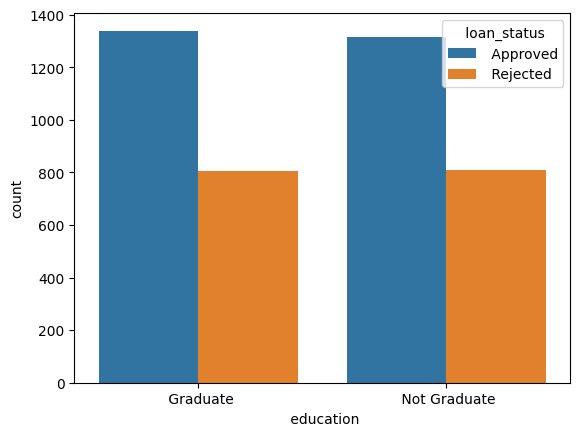

In [15]:
counts = df.groupby([' education', ' loan_status']).size()
print("Counts for each unique education status and loan status:")
print(counts)
sns.countplot(x=' education',hue= ' loan_status',data=df)

From the two figures, we can conclude that education status does not have much significance in determining whether the loan will be approved or not, since figures in both rejected and approved are close to same for both groups


<Axes: >

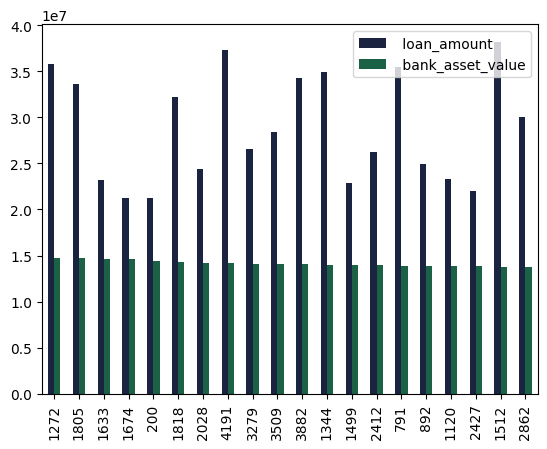

In [16]:
#Bargraph to show correlation of clients with most loan amount, grouped by bank_asset_value
df[[' loan_amount',' bank_asset_value']].nlargest(n=20,columns=' bank_asset_value').plot(kind='bar', color= sns.color_palette('cubehelix'))

There is a significant advantage to those people who had a higher shares /bank assets when it comes to amount of loans one can get from the bank as shown in our bar plot.
The same applies to the residential, commercial and luxury asset values, as we shall see in the heatmaps as below:



Text(0.5, 1.0, 'Correlation Heatmap')

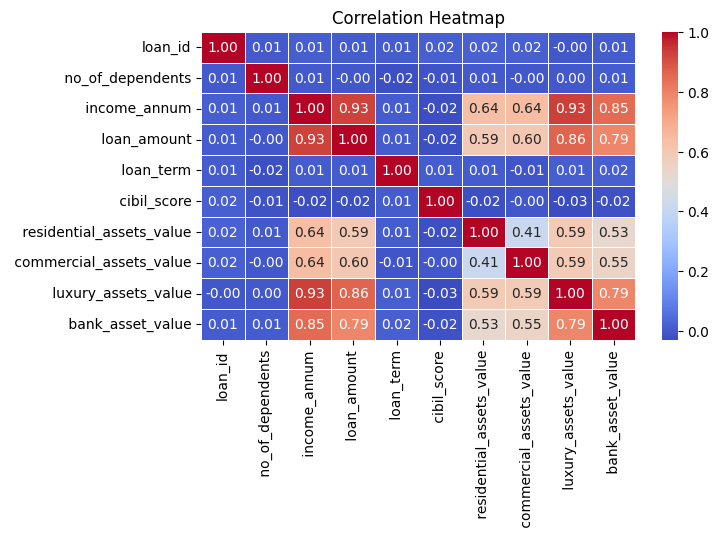

In [31]:
#Correlation heat maps to see relationship between numerical columns
numeric_cols = df.select_dtypes(include=['int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')


A value close to 1 indicates a perfect positive correlation (eg as income_annum increases, loan_amount also increases).
A value closer to -1 indicate a negative correlation (eg even if you luxury_asset_value and cibil score is low chances loan application will be rejected).
0 indicates no correlation between the features.

C:\Users\SOLOMON\AppData\Local\Temp\ipykernel_10036\1306704596.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel=' loan_amount', ylabel='Density'>

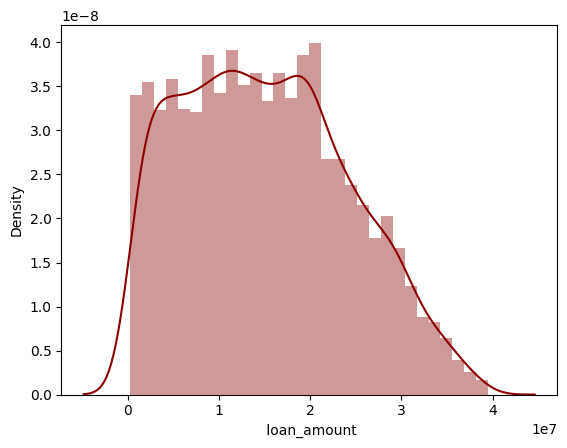

In [33]:
#Distribution of loan_amounts
sns.distplot(df[' loan_amount'],color='darkred',kde=True,bins=30)


The histogram translates as: The loan amount  for the borrowes was ranging from hundreds thousands to 3.9M.


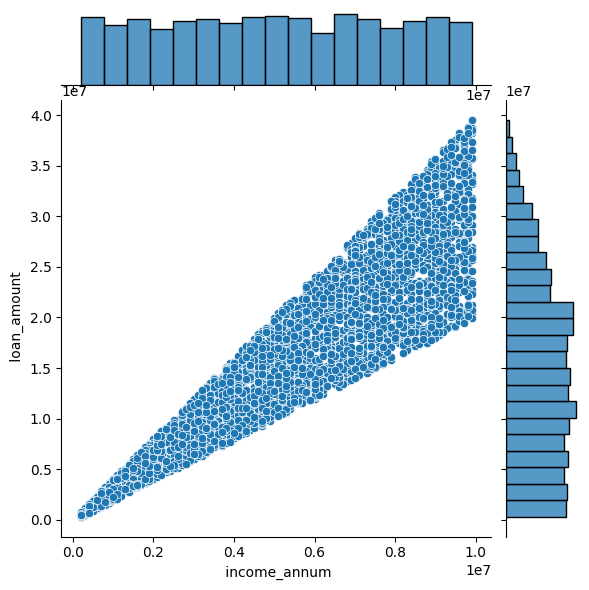

In [19]:
#The jointplot is to investigate the relationship between income and loan amount
sns.jointplot(x=' income_annum',y=' loan_amount',data=df,kind='scatter')

The above jointplot indicates that as income increases so does the loan amount.There is a close relationship between the loan amount and the income. 


C:\Users\Sarah Ngatia\AppData\Local\Temp\ipykernel_3740\290097539.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




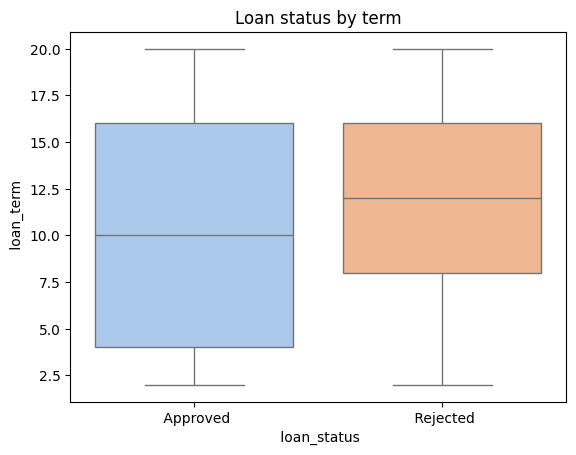

In [ ]:
#Boxplot to investigate the relatioship between
sns.boxplot(x=' loan_status', y=' loan_term', data=df, palette='pastel')
plt.title('Loan status by term')
plt.show()

The boxplot shows that there were more loans with shorter terms approved than there were with a longer loan term

C:\Users\Sarah Ngatia\AppData\Local\Temp\ipykernel_3740\2034950760.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




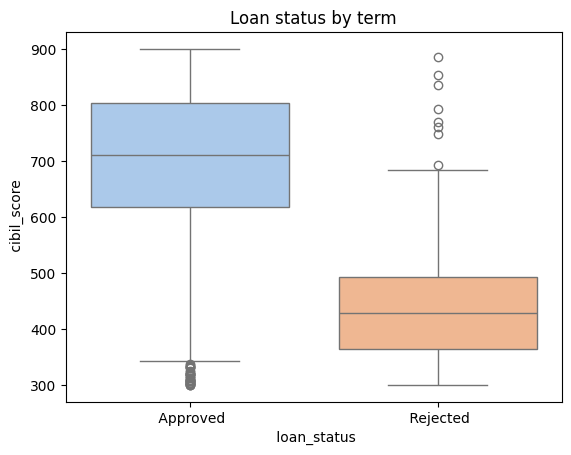

In [ ]:
#Boxplot to show relationship between loan status and cibil score
sns.boxplot(x=' loan_status', y=' cibil_score', data=df, palette='pastel')
plt.title('Loan status by cibil score')
plt.show()

With the boxplot, we can conclude that although there are a few outliers, a lower cibil score warrants a rejected loan application and the inverse is true.


# General Overview of distribution Loan amount by loan status using violin plot
 


In [ ]:
fig = px.violin(df, x=' loan_status', y=' loan_amount', title='Distribution of Loan Amounts by Loan Status', 
                points='all', box=True, hover_data=df.columns)
fig.update_layout(xaxis_title='Loan Status', yaxis_title='Loan Amount')
fig.show()

The violin plot displays the distribution of the loan application data, providing insights into its probability density. With this, we are able compare the distribution of different numerical variable across different categories in our dataframe.
We can get such insights as min/max approved/declined loan amount, the median and even detailed info on each loan id and where it lies in the box plot distribution.